In [2]:
# importing the Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [3]:
# Read the movie data and the show data
movie_data=pd.read_csv("resources/movieData.csv")
show_data=pd.read_csv("resources/showData.csv")

In [4]:
#filling na values with 0
movie_data.fillna(0, inplace=True)

In [5]:
#Display the movie data
movie_data.head()

,Unnamed: 0,id,title,release_year,release_decade,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes,actors,directors
0,0,tm84618,Taxi Driver,1976,70s,R,114,"['drama', 'crime']",['US'],8.2,808582.0,"['Robert De Niro 3748 ACTOR', 'Jodie Foster 14...",['Martin Scorsese 3308 DIRECTOR']
1,1,tm154986,Deliverance,1972,70s,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,"['Jon Voight 10103 ACTOR', 'Burt Reynolds 1302...",['John Boorman 17727 DIRECTOR']
2,2,tm127384,Monty Python and the Holy Grail,1975,70s,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0,"['Graham Chapman 11472 ACTOR', 'John Cleese 15...","['Terry Jones 11475 DIRECTOR', 'Terry Gilliam ..."
3,3,tm120801,The Dirty Dozen,1967,60s,0,150,"['war', 'action']","['GB', 'US']",7.7,72662.0,"['Lee Marvin 35196 ACTOR', 'Ernest Borgnine 10...",['Robert Aldrich 1063 DIRECTOR']
4,4,tm70993,Life of Brian,1979,70s,R,94,['comedy'],['GB'],8.0,395024.0,"['Graham Chapman 11472 ACTOR', 'John Cleese 15...",['Terry Jones 11475 DIRECTOR']


In [6]:
#filling na values with o
show_data.fillna(0, inplace=True)

In [7]:
#Display the show data 
show_data.head()

,Unnamed: 0,id,title,release_year,release_decade,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,actors,directors
0,0,ts22164,Monty Python's Flying Circus,1969,60s,TV-14,30,"['comedy', 'european']",['GB'],4.0,8.8,73424.0,"['Graham Chapman 11472 ACTOR', 'Michael Palin ...",0
1,1,ts45948,Monty Python's Fliegender Zirkus,1972,70s,TV-MA,43,['comedy'],[],1.0,8.1,2151.0,"['Graham Chapman 11472 ACTOR', 'John Cleese 15...",['Ian MacNaughton 16383 DIRECTOR']
2,2,ts20681,Seinfeld,1989,80s,TV-PG,24,['comedy'],['US'],9.0,8.9,308824.0,"['Jerry Seinfeld 32954 ACTOR', 'Jason Alexande...",0
3,3,ts22082,Knight Rider,1982,80s,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,6.9,34115.0,"['David Hasselhoff 8464 ACTOR', 'Edward Mulhar...",0
4,4,ts21715,Thomas & Friends,1984,80s,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,6.5,5104.0,['Rachael Louise Miller 1381431 ACTOR'],0


Summary Statistics For Show and Movie Data

In [8]:
#Getting the summary statistics for the movie data.
movie_data.describe()

,Unnamed: 0,release_year,runtime,imdb_score,imdb_votes
count,3429.000000,3429.000000,3429.000000,3429.000000,3.429000e+03
mean,1714.000000,2015.714494,101.066200,6.246748,2.678382e+04
std,990.011364,7.792890,27.864493,1.127486,1.066040e+05
min,0.000000,1954.000000,2.000000,1.500000,0.000000e+00
25%,857.000000,2015.000000,88.000000,5.600000,5.430000e+02
50%,1714.000000,2018.000000,100.000000,6.400000,2.564000e+03
75%,2571.000000,2020.000000,116.000000,7.100000,1.141800e+04
max,3428.000000,2022.000000,225.000000,9.100000,2.294231e+06


In [9]:
#Getting the summary statistics for the show data
show_data.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes
count,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1.939000e+03
mean,969.000000,2017.332646,38.765859,2.232078,6.977927,1.733155e+04
std,559.885405,5.179166,17.207135,2.769952,1.077401,7.208902e+04
min,0.000000,1969.000000,0.000000,1.000000,2.000000,5.000000e+00
25%,484.500000,2016.000000,25.000000,1.000000,6.400000,4.580000e+02
50%,969.000000,2019.000000,41.000000,1.000000,7.100000,1.766000e+03
75%,1453.500000,2020.000000,49.000000,2.500000,7.700000,7.203500e+03
max,1938.000000,2022.000000,178.000000,42.000000,9.600000,1.775990e+06


Based on the summary statistics above, the standard deviation for movies runtime and imdb_score is 30.640640 and 2.042526.
while that of the show data is 17.626354 and 2.150654. This suggests greater variability in the spread of the movie runtime
when compared to that of the shows.Also the scores suggest more variability in that of the shows.From both(movies&shows) imbd_scores we see that most shows and movies have imdb_scores that are closer to the mean.And this suggests some level of consistency in the ratings observations.












Box Plot Showing the distribution of runtime and imdb scores in the show and movie data

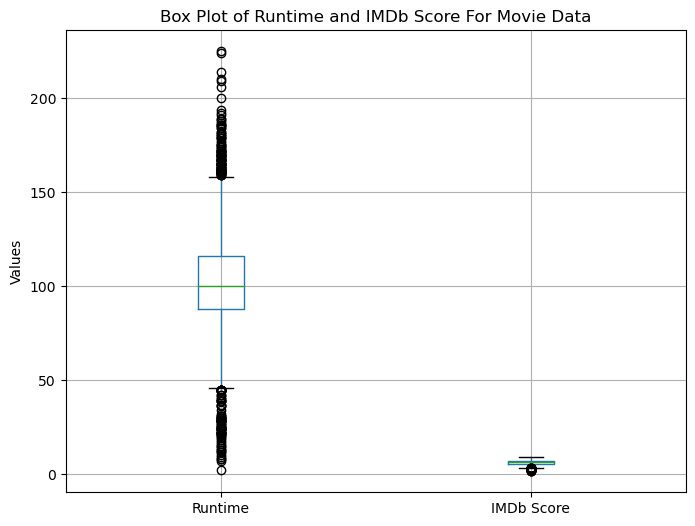

In [12]:
#plotting the distribution of runtime and ratings for the movie data.
plt.figure(figsize=(8, 6))
boxplot_movies = movie_data.boxplot(column=['runtime', 'imdb_score'])
plt.title('Box Plot of Runtime and IMDb Score For Movie Data')
plt.ylabel('Values')
plt.xticks([1, 2], ['Runtime', 'IMDb Score'])
plt.savefig('boxplot_movie.jpg',bbox_inches='tight', dpi=150)
plt.show()

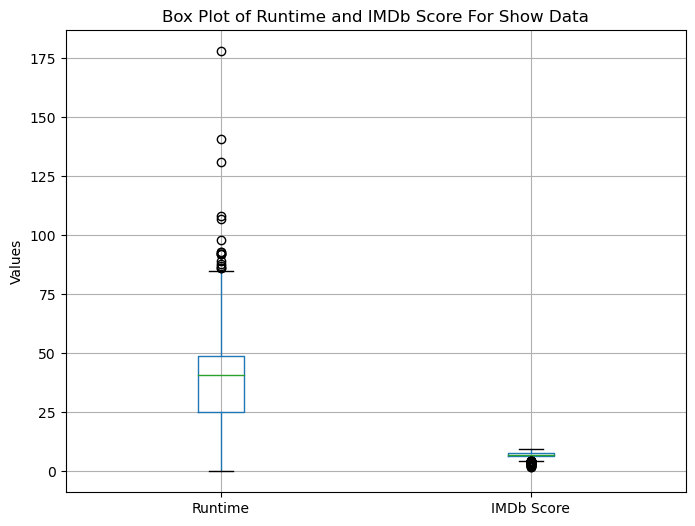

In [13]:
#plotting the distribution of runtime and ratings for the show data.
plt.figure(figsize=(8, 6))
boxplot_show =show_data .boxplot(column=['runtime', 'imdb_score'])
plt.title('Box Plot of Runtime and IMDb Score For Show Data')
plt.ylabel('Values')
plt.xticks([1, 2], ['Runtime', 'IMDb Score'])
plt.savefig('boxplot_show.jpg',bbox_inches='tight', dpi=150)
plt.show()

From the boxplots we can see outliers above and below the upper and lower whiskers for the runtime in movie data.
while a few points are spoted below the lower whiskers for the imdb_score.The show data shows points above the upper whiskers
suggesting a deviation from observations recorded at the mean for the runtime and a few points below the lower whiskers 
in the imdb_score.


How has the number of TV shows and movies released each year changed over time?

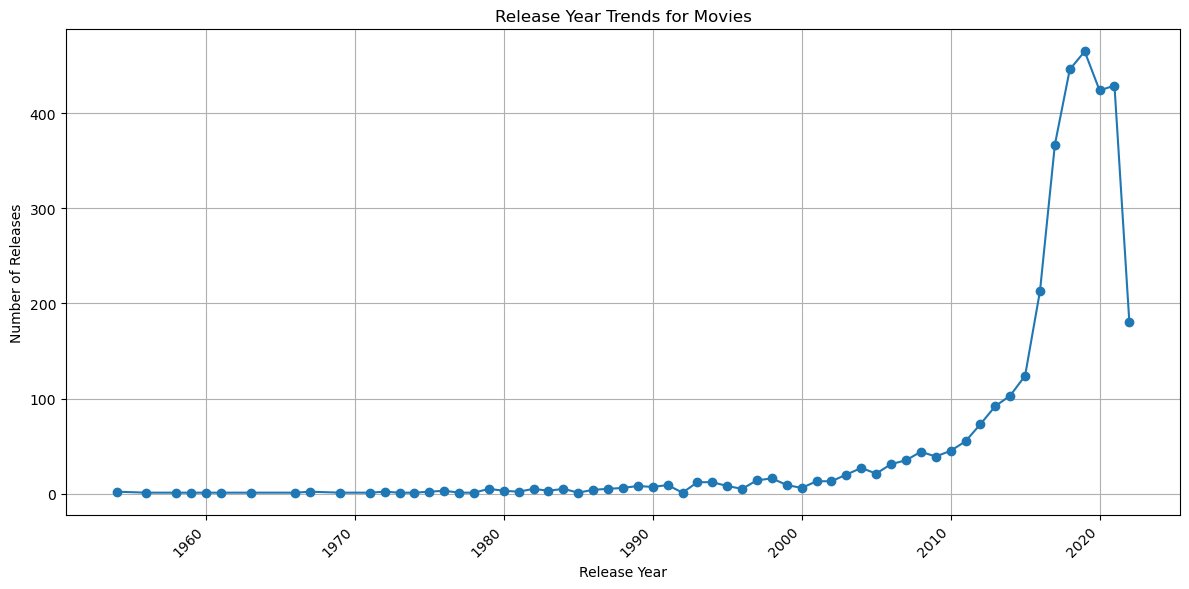

In [14]:
# Group by release year , and count the number of movies released each year
release_year_trends_movies = movie_data.groupby('release_year').size()

# Plotting release year trends for movies 
plt.figure(figsize=(12, 6))
release_year_trends_movies.plot(kind='line', marker='o')
plt.title('Release Year Trends for Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.savefig('release_year_trends_movies.jpg',bbox_inches='tight', dpi=150)
plt.grid(True)
plt.show()

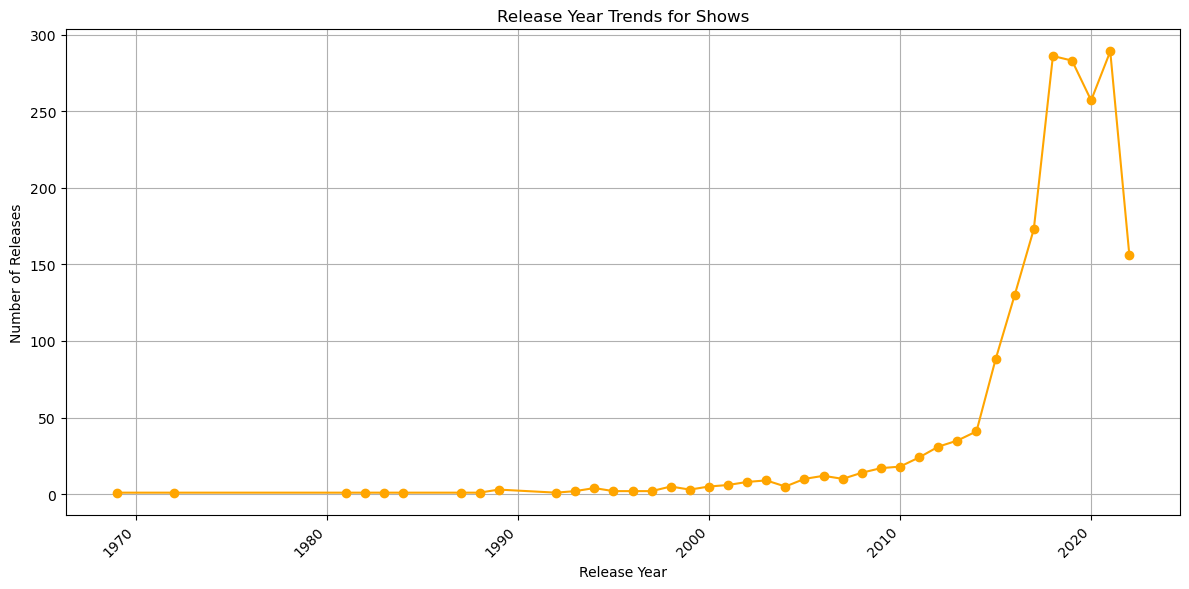

In [15]:
# Group by release year  and count the number of shows released each year
release_year_trends_shows = show_data.groupby('release_year').size()

# Plotting release year trends for movies 
plt.figure(figsize=(12, 6))
release_year_trends_shows.plot(kind='line', marker='o', color="orange")
plt.title('Release Year Trends for Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('release_year_trends_shows.jpg',bbox_inches='tight', dpi=150)
plt.grid(True)
plt.show()

Based on the line charts depicting release year trend.From the movie data, we can see an uptrend depicting an increase in the number of movies released over the years
with the greatest release number in 2019, after which we experience a downward trend.For the shows data greatest release year
is in 2021 after which a decline is experienced.


IS THERE A RELATIONSHIP BETWEEN THE RUN TIME AND IMDB SCORE FOR MOVIE AND TV SHOWS

In [16]:
correlation_coefficient = movie_data['runtime'].corr(movie_data['imdb_score'])
print("Correlation Coefficient between movie Runtime and IMDb Score:", correlation_coefficient)

Correlation Coefficient between movie Runtime and IMDb Score: 0.11406543032944803


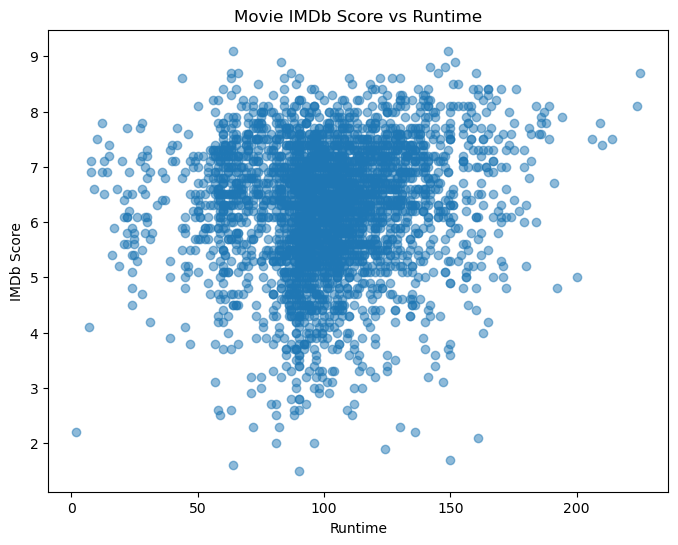

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(movie_data['runtime'], movie_data['imdb_score'], alpha=0.5)
plt.title('Movie IMDb Score vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.savefig('imdb_scorevs_runtime_movie.jpg',bbox_inches='tight', dpi=150)
plt.show()

In [19]:
correlation_coefficient = show_data['runtime'].corr(show_data['imdb_score'])
print("Correlation Coefficient between show Runtime and IMDb Score:", correlation_coefficient)

Correlation Coefficient between show Runtime and IMDb Score: 0.23196819349445844


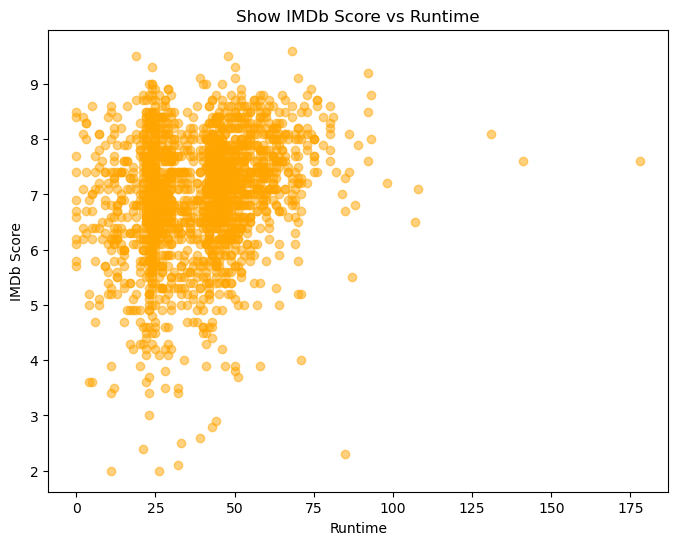

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(show_data['runtime'], show_data['imdb_score'], alpha=0.5,color="orange")
plt.title('Show IMDb Score vs Runtime')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.savefig('imdb_scorevs_runtime_show.jpg',bbox_inches='tight', dpi=150)
plt.show()

The correlation_coefficient for Movie data is 0.3132759710827395, depicting a positive but not strong enough corelation
between movie data and the runtime. In other words the higher the run time of a movie the higher the imdb_score.
That of the Show data is at 0.06844679114314593 this suggests a weak positive relationship between the show run time.
In other words there is almost no linear relationship between the show runtime and IMDb score.
and any observed relationship is likely due to chance rather than a relationship between the variables.